In [17]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import numpy as np


Load the MNIST dataset

In [18]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

Visualize the dataset

Target labels:  [0 8 9 6 4 6 8 1 2 9]


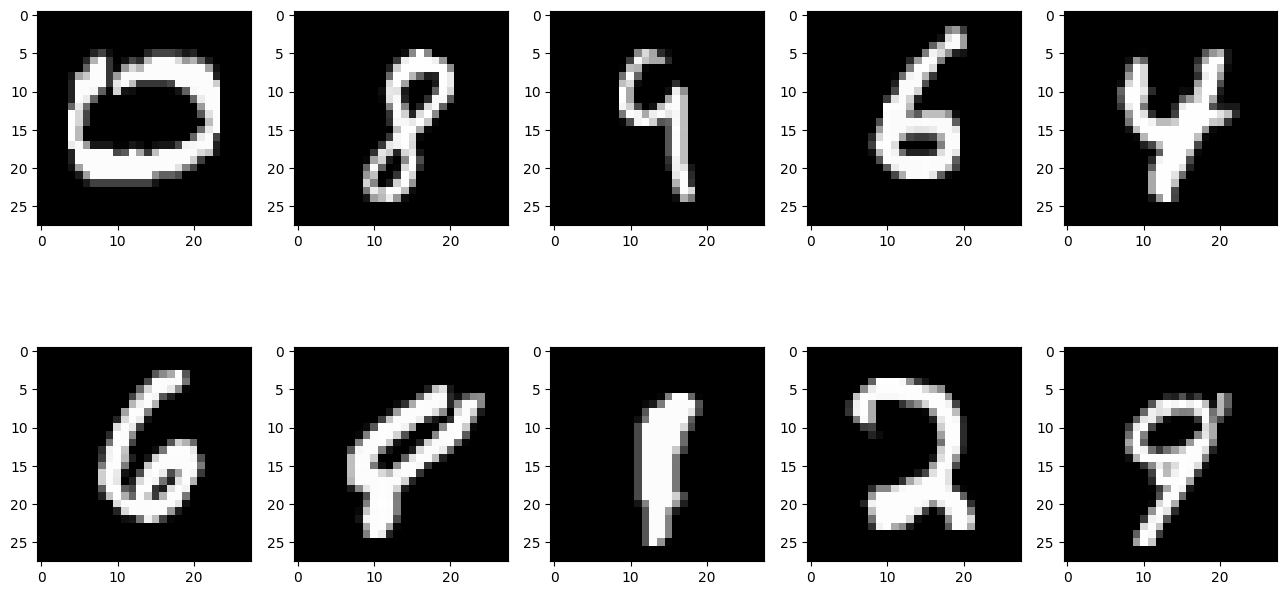

In [19]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [20]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [23]:

model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(64,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(32,activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(10,activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

Train the model

In [26]:
train_info = model.fit(new_train_data , new_train_target , epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9638 - loss: 0.2729
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9654 - loss: 0.2576
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9692 - loss: 0.2463
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9717 - loss: 0.2336
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9710 - loss: 0.2350
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9720 - loss: 0.2317
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9737 - loss: 0.2256
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9738 - loss: 0.2244
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9726 - loss: 0.2263
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9740 - loss: 0.2212
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9749 - loss: 0.2200
Epoch 12/15
1875/1875 ━━━━━━

Plot the loss and accuracy graphs

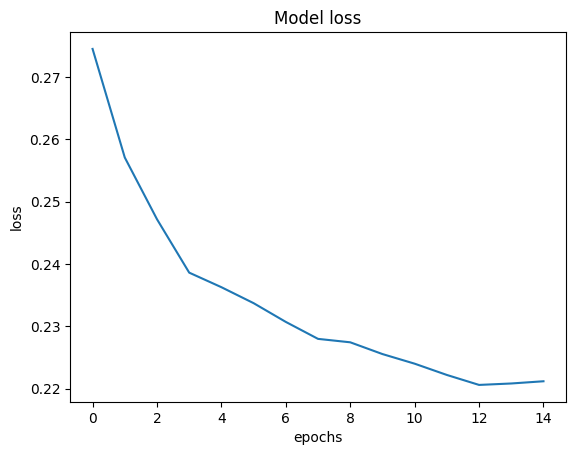

In [27]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

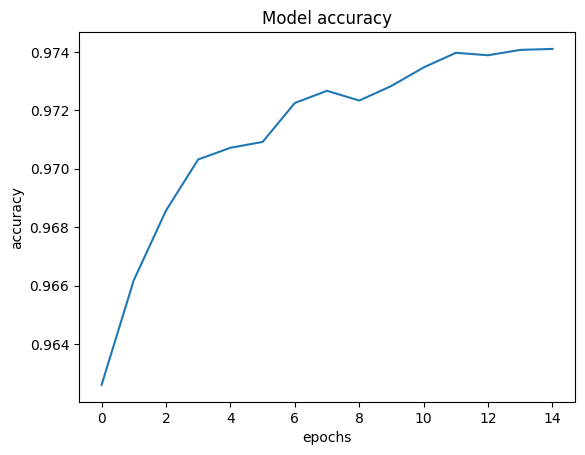

In [28]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [29]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9715 - loss: 0.2298
Loss of the Test dataset is: 0.2128208428621292
Accuracy of the test dataset is: 0.9757000207901001


Save the model weights

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


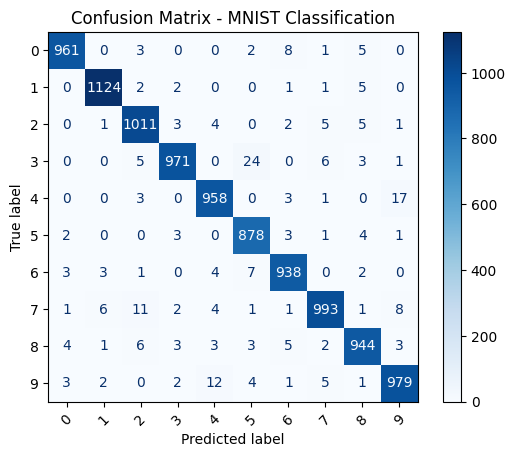

In [30]:
#c. Visualize class-wise test dataset performance using a confusion matrix.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_classes = np.argmax(model.predict(new_test_data), axis=1)
cm = confusion_matrix(test_target, y_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix - MNIST Classification")
plt.show()

In [31]:
model.save_weights('MNIST_WEIGHTS_V1.weights.h5')